# Task One

### Load dataset and import necessary libraries
- Load Dataset
- import necessary libraries
- check dataset - head, shape, info, describe, dtypes

In [119]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

import keras as keras
from keras.models import Sequential
from keras.layers import Dense

from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import StratifiedKFold


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]


In [120]:
columns = [ 'ID',
           'senior', 
           'tenure', 
           'streaming', 
           'contract',
           'payMethod',
           'monthlyCharges',
           'totalCharges', 
           'churn']

In [121]:
df = pd.read_csv("CustomerChurn.csv", names = columns, header=0)

In [122]:
df.head()

,ID,senior,tenure,streaming,contract,payMethod,monthlyCharges,totalCharges,churn
0,5575-GNVDE,0.0,34.0,No,One year,Mailed check,56.95,1889.50,No
1,3668-QPYBK,0.0,2.0,No,Month-to-month,Mailed check,53.85,108.15,Yes
2,7795-CFOCW,0.0,45.0,No,One year,Bank transfer (automatic),42.30,1840.75,No
3,9237-HQITU,0.0,2.0,No,Month-to-month,Electronic check,70.70,151.65,Yes
4,9305-CDSKC,NaN,NaN,Yes,NaN,NaN,99.65,NaN,Yes


In [123]:
df.shape

(7042, 9)

In [124]:
df.dtypes

ID                 object
senior            float64
tenure            float64
streaming          object
contract           object
payMethod          object
monthlyCharges    float64
totalCharges       object
churn              object
dtype: object

In [125]:
df.describe()

,senior,tenure,monthlyCharges
count,7039.000000,7020.000000,7040.000000
mean,0.162239,32.370513,64.757997
std,0.368696,24.569394,30.088687
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7042 non-null   object 
 1   senior          7039 non-null   float64
 2   tenure          7020 non-null   float64
 3   streaming       7041 non-null   object 
 4   contract        7040 non-null   object 
 5   payMethod       7041 non-null   object 
 6   monthlyCharges  7040 non-null   float64
 7   totalCharges    7041 non-null   object 
 8   churn           7042 non-null   object 
dtypes: float64(3), object(6)
memory usage: 495.3+ KB


# Task Two
### Initial preprocessing (basic cleaning) & split
#### Before Splitting
 - Simple casting and imputing
 - convert numeric data accidentally casted as object('totalCharges')
#### After Splitting
 - Imputing with mean() - do after splitting to prevent data leaks
 - OneHotEncoding - do after splitting to prevent data leaks 

In [127]:
Data_Training = df.copy()

In [128]:
#convert Datatype of 'totalCharges' to int64, from object, errors =‘coerce’, then invalid parsing will be set as NaN.
Data_Training['totalCharges'] = pd.to_numeric(Data_Training['totalCharges'], errors='coerce')

In [129]:
Data_Training['totalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7042 entries, 0 to 7041
Series name: totalCharges
Non-Null Count  Dtype  
--------------  -----  
7030 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [130]:
print(Data_Training)

              ID  senior  tenure streaming        contract  \
0     5575-GNVDE     0.0    34.0        No        One year   
1     3668-QPYBK     0.0     2.0        No  Month-to-month   
2     7795-CFOCW     0.0    45.0        No        One year   
3     9237-HQITU     0.0     2.0        No  Month-to-month   
4     9305-CDSKC     NaN     NaN       Yes             NaN   
...          ...     ...     ...       ...             ...   
7037  6840-RESVB     NaN     NaN       NaN        One year   
7038  2234-XADUH     0.0    72.0       Yes        One year   
7039  4801-JZAZL     0.0    11.0        No  Month-to-month   
7040  8361-LTMKD     1.0     4.0        No  Month-to-month   
7041  3186-AJIEK     NaN     NaN       Yes             NaN   

                      payMethod  monthlyCharges  totalCharges churn  
0                  Mailed check           56.95       1889.50    No  
1                  Mailed check           53.85        108.15   Yes  
2     Bank transfer (automatic)           42.

In [131]:
#Drop the column ID as it does not have any meaning
Data_Training = Data_Training.drop('ID',axis = 1, inplace = False)

In [132]:
Data_Training.head()

,senior,tenure,streaming,contract,payMethod,monthlyCharges,totalCharges,churn
0,0.0,34.0,No,One year,Mailed check,56.95,1889.50,No
1,0.0,2.0,No,Month-to-month,Mailed check,53.85,108.15,Yes
2,0.0,45.0,No,One year,Bank transfer (automatic),42.30,1840.75,No
3,0.0,2.0,No,Month-to-month,Electronic check,70.70,151.65,Yes
4,NaN,NaN,Yes,NaN,NaN,99.65,NaN,Yes


#### Split your dataset into training and testing sets. Your target is totalCharges. Use an 80/20 split.
Keep the random state fixed for reproducibility. You will need to use the same data for both models of Task 5 and Task 6.
Your models will have to output the feature **totalCharges**.
#### ConstraintThe random key for the split should be the first 2 digits in your raptor username.
- username: ta106 key:10

In [133]:
#Keep the target variable at the end for easy splitting
Data_Training['totalCharges'] = Data_Training.pop('totalCharges')

In [134]:
Data_Training.head()

,senior,tenure,streaming,contract,payMethod,monthlyCharges,churn,totalCharges
0,0.0,34.0,No,One year,Mailed check,56.95,No,1889.50
1,0.0,2.0,No,Month-to-month,Mailed check,53.85,Yes,108.15
2,0.0,45.0,No,One year,Bank transfer (automatic),42.30,No,1840.75
3,0.0,2.0,No,Month-to-month,Electronic check,70.70,Yes,151.65
4,NaN,NaN,Yes,NaN,NaN,99.65,Yes,NaN


In [135]:
# Split up our data in to training and verification
# In this case: 
# - training 80% of the examples
# - test is 20% of the examples

X = Data_Training.loc[:, "senior":"churn"]
y = Data_Training.totalCharges
X

,senior,tenure,streaming,contract,payMethod,monthlyCharges,churn
0,0.0,34.0,No,One year,Mailed check,56.95,No
1,0.0,2.0,No,Month-to-month,Mailed check,53.85,Yes
2,0.0,45.0,No,One year,Bank transfer (automatic),42.30,No
3,0.0,2.0,No,Month-to-month,Electronic check,70.70,Yes
4,NaN,NaN,Yes,NaN,NaN,99.65,Yes
...,...,...,...,...,...,...,...
7037,NaN,NaN,NaN,One year,Mailed check,NaN,No
7038,0.0,72.0,Yes,One year,Credit card (automatic),103.20,No
7039,0.0,11.0,No,Month-to-month,Electronic check,29.60,No
7040,1.0,4.0,No,Month-to-month,Mailed check,74.40,Yes


In [136]:
y

0       1889.50
1        108.15
2       1840.75
3        151.65
4           NaN
         ...   
7037    1990.50
7038    7362.90
7039     346.45
7040     306.60
7041    6844.50
Name: totalCharges, Length: 7042, dtype: float64

In [137]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [138]:
#To make sure there is no data loss
Xtrain.shape[0] + Xtest.shape[0] == X.shape[0]

True

## Task 3: Further preprocessing (post-split)
Apply transformations that learn from data, such as imputing that may have caused leaking if done in Task 1, and encoding of categorical variables.
- Hint. Transformations need to be applied to both training and test sets, but fitting them only on the training set
- Imputing with mean() - do after splitting to prevent data leaks
-  OneHotEncoding - do after splitting to prevent data leaks 

In [139]:
#Fill missing values with mean and mode
#Divide the features into numeric and categorical
#senior is a categorical value with 0,1 for no/yes senior.
numericCols = ['tenure', 'monthlyCharges']
categoricalCols = ['senior', 'streaming', 'contract', 'payMethod', 'churn']


In [140]:
#Find mean for numerical values and mode for categorical values from Traning set
train_mean = Xtrain[numericCols].mean()
train_mode = Xtrain[categoricalCols].mode().iloc[0]

In [141]:
#Impute the training set
Xtrain[numericCols] = Xtrain[numericCols].fillna(train_mean)
Xtrain[categoricalCols] = Xtrain[categoricalCols].fillna(train_mode)

#Impute the target variable totalCharges
ytrain =ytrain.fillna(ytrain.mean())

In [142]:
#Impute the Test Set
Xtest[numericCols] = Xtest[numericCols].fillna(train_mean)
Xtest[categoricalCols] = Xtest[categoricalCols].fillna(train_mode)

#Impute the target variable totalCharges
ytest =ytest.fillna(ytrain.mean())

In [143]:
#check for null values
Xtrain.isnull().sum()

senior            0
tenure            0
streaming         0
contract          0
payMethod         0
monthlyCharges    0
churn             0
dtype: int64

In [144]:
Xtest.isnull().sum()

senior            0
tenure            0
streaming         0
contract          0
payMethod         0
monthlyCharges    0
churn             0
dtype: int64

In [145]:
ytrain.isnull().sum()

0

In [146]:
ytest.isnull().sum()

0

In [147]:
# OneHotEncoding For categorical values
categoricalCols = ['streaming', 'contract', 'payMethod', 'churn']

encoder = OneHotEncoder(sparse_output=False)

Xtrain_encoded = encoder.fit_transform(Xtrain[categoricalCols]) #Fit on Training Data
Xtest_encoded  = encoder.transform(Xtest[categoricalCols])        

Xtrain_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [148]:
# Assign names automatically to new columns
encoded_cols = encoder.get_feature_names_out(categoricalCols)
encoded_cols

array(['streaming_No', 'streaming_No internet service', 'streaming_Yes',
       'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'payMethod_Bank transfer (automatic)',
       'payMethod_Credit card (automatic)', 'payMethod_Electronic check',
       'payMethod_Mailed check', 'churn_No', 'churn_Yes'], dtype=object)

In [149]:
#Add the encoded columns to the training and test set
for i, col_name in enumerate(encoded_cols):
    Xtrain[col_name] = Xtrain_encoded[:, i]
    Xtest[col_name]  = Xtest_encoded[:, i]
#Drop the original columns
Xtrain = Xtrain.drop(columns=categoricalCols)
Xtest  = Xtest.drop(columns=categoricalCols)

Xtrain

,senior,tenure,monthlyCharges,streaming_No,streaming_No internet service,streaming_Yes,contract_Month-to-month,contract_One year,contract_Two year,payMethod_Bank transfer (automatic),payMethod_Credit card (automatic),payMethod_Electronic check,payMethod_Mailed check,churn_No,churn_Yes
760,0.0,22.0,89.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6382,0.0,23.0,40.10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
336,0.0,68.0,88.15,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
57,0.0,34.0,24.95,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1227,0.0,49.0,100.85,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1.0,21.0,60.05,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3441,0.0,29.0,98.80,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1344,0.0,57.0,100.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4623,0.0,8.0,94.70,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Task 4: Decision Tree Regression
Train a DecisionTreeRegressor with the training data, and predict on the test data. Your model will predict the feature **totalCharges**. Evaluate using the 𝑅" score (also known as coefficient of determination) and plot predicted vs. actual values

In [150]:
#Model Training
regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(Xtrain, ytrain)

DecisionTreeRegressor(random_state=10)

In [151]:
#Predict using the trained model on unseen data
y_pred = regressor.predict(Xtest)
r2_test = r2_score(ytest,y_pred)

In [152]:
r2_test

0.9938116059534835

In [153]:
#See how it behaves on training data for comparison
r2_train = r2_score(ytrain, regressor.predict(Xtrain))
r2_train

0.999994699759908

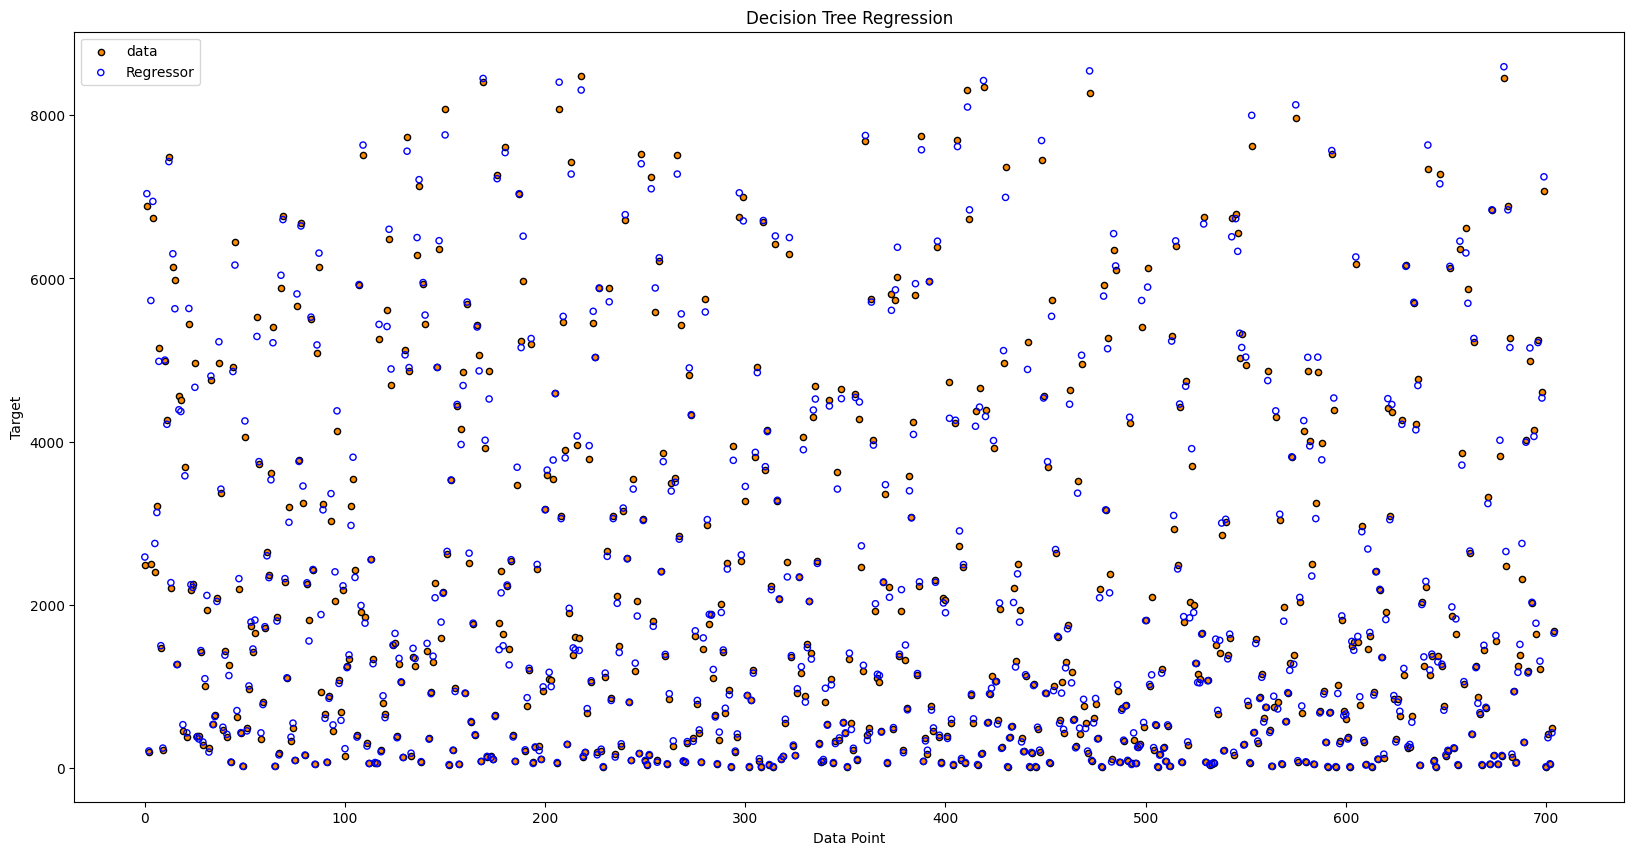

In [154]:
#plot between the Predicted and Actual values
indices = np.arange(len(ytest))

plt.figure(figsize=(20,10))

plt.scatter(indices, ytest, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(indices, y_pred, s=20, edgecolor="blue", c="none", label="Regressor")

plt.xlabel("Data Point")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()

plt.show()

# Task 5: Neural Network Regression (Keras)
- Make sure numeric data is normalized (only use methods we have seen in lectures/classes).
- Build a fully-connected feedforward neural network using Keras. 
Briefly jusity a few lines of code
comment) the chosen setting for your ANN (layers, neurons, ..)

In [155]:
model = Sequential()
#normalisation inside ANN
model.add(keras.layers.Normalization(input_dim = Xtrain.shape[1])) # number of columns (predictors)
model.layers[0].adapt(Xtrain)

#First Hidden layer,
model.add(Dense(16, input_dim=Xtrain.shape[1], activation='relu')) 

#relu activation function is used for fast computation and reducing vanishing gradient problem

#Second Hidden Layer
model.add(Dense(16, activation='relu'))

# Final layer, linear is used for Regression tasks.
model.add(Dense(1, activation='linear'))                          

# Model specified - construct it now
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 15)                31        
 tion)                                                           
                                                                 
 dense_27 (Dense)            (None, 16)                256       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 576 (2.25 KB)
Trainable params: 545 (2.13 KB)
Non-trainable params: 31 (128.00 Byte)
_________________________________________________________________


In [156]:
Xtrain.isnull()

,senior,tenure,monthlyCharges,streaming_No,streaming_No internet service,streaming_Yes,contract_Month-to-month,contract_One year,contract_Two year,payMethod_Bank transfer (automatic),payMethod_Credit card (automatic),payMethod_Electronic check,payMethod_Mailed check,churn_No,churn_Yes
760,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6382,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
336,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4623,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Train the model

In [157]:
h = model.fit (
    Xtrain,
    ytrain,
    batch_size=32,                    # Randomly select 32 training examples per epoch 
    validation_data = (Xtest, ytest), # To avoid over-fitting we can monitor the accuracy during training
    verbose=True,
    epochs = 1000)

Epoch 1/1000
199/199 [==============================] - 3s 7ms/step - loss: 10306985.0000 - mean_absolute_error: 2276.4055 - val_loss: 10199826.0000 - val_mean_absolute_error: 2275.5989
Epoch 2/1000
199/199 [==============================] - 1s 6ms/step - loss: 9630049.0000 - mean_absolute_error: 2190.0107 - val_loss: 8671587.0000 - val_mean_absolute_error: 2089.6653
Epoch 3/1000
199/199 [==============================] - 1s 6ms/step - loss: 7098579.5000 - mean_absolute_error: 1866.0323 - val_loss: 5254833.0000 - val_mean_absolute_error: 1619.1254
Epoch 4/1000
199/199 [==============================] - 1s 4ms/step - loss: 3721589.0000 - mean_absolute_error: 1327.0663 - val_loss: 2407369.2500 - val_mean_absolute_error: 1074.8140
Epoch 5/1000
199/199 [==============================] - 1s 5ms/step - loss: 1874795.6250 - mean_absolute_error: 939.9146 - val_loss: 1450077.1250 - val_mean_absolute_error: 833.6806
Epoch 6/1000
199/199 [==============================] - 1s 6ms/step - loss: 1326

#### Calculate the loss

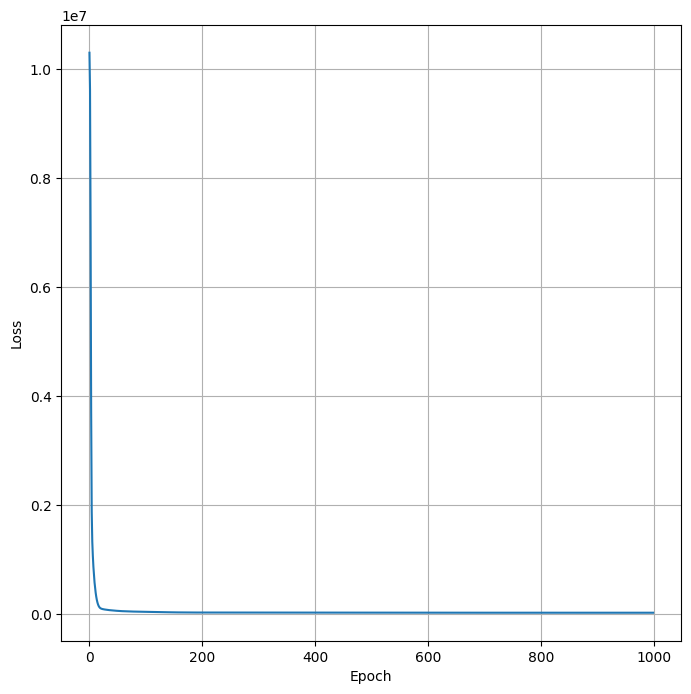

In [160]:
def LossHistory(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  #plt.legend()
  plt.grid(True)
  plt.show()

LossHistory(h)

#### Evaluate using the 𝑅" score (also known as coefficient of determination). 
- Make sure the ANN model performs better than the Decision Tree.
- Plot predicted vs. actual values.

In [158]:
#Model Prediction on unseen data
y_pred_ANN = model.predict(Xtest)
r2 = r2_score(ytest, y_pred_ANN)
print('r2 for ANN model is: ', r2)

23/23 [==============================] - 0s 3ms/step
r2 for ANN model is:  0.9963357467039929


In [161]:
print("Train R2:", r2_score(ytrain, model.predict(Xtrain)))
print("Test R2:", r2_score(ytest, model.predict(Xtest)))


199/199 [==============================] - 1s 3ms/step
Train R2: 0.9961954780032511
23/23 [==============================] - 0s 6ms/step
Test R2: 0.9963357467039929


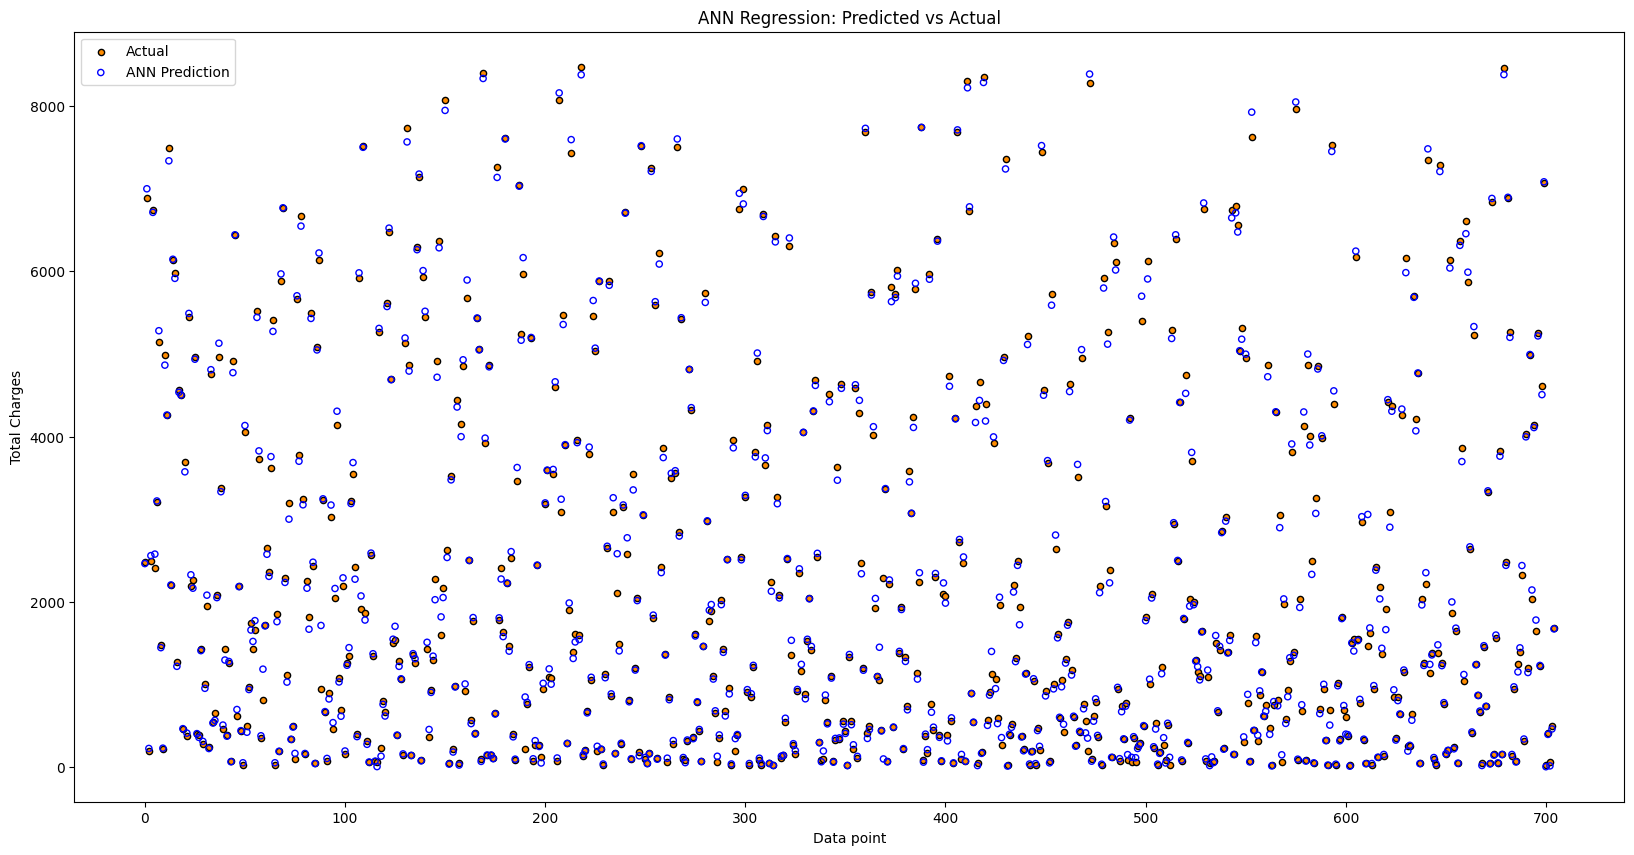

In [159]:
#plot the actual vs predicted
indices = np.arange(len(ytest))
plt.figure(figsize=(20,10))
plt.scatter(indices, ytest, s=20, edgecolor="black", c="darkorange", label="Actual")
plt.scatter(indices, y_pred_ANN, s=20, edgecolor="blue", c="none", label="ANN Prediction")
plt.xlabel("Data point")
plt.ylabel("Total Charges")
plt.title("ANN Regression: Predicted vs Actual")
plt.legend()
plt.show()